**Upload spamham.csv Dataset**

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from google.colab import files
import matplotlib.pyplot as plt
uploaded=files.upload()

Saving spamham.csv to spamham.csv


In [96]:
import numpy as np
from numpy import random
from random import randrange
##Loading Dataset
data = pd.read_csv("spamham.csv")
print(data.describe())
data

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [97]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [98]:
def split(dataset, split=0.80):
	train = list()
	test_size = split * len(dataset)
	test = list(dataset)
	while len(train) < test_size:
		index = randrange(len(test))
		train.append(test.pop(index))
	return train, test

In [99]:
df=data.values.tolist()
train,test=split(df,0.8)
train,cv=split(train,0.8)

In [100]:
print (np.shape(df))
print (np.shape(train))
print (np.shape(test))
print (np.shape(cv))

(5728, 2)
(3667, 2)
(1145, 2)
(916, 2)


In [101]:
TrainSet=pd.DataFrame(train,columns=['text','spam'])
x_train = TrainSet["text"]
y_train = TrainSet["spam"]
y_train.value_counts()

0    2773
1     894
Name: spam, dtype: int64

In [102]:
CVSet=pd.DataFrame(cv,columns=['text','spam'])
x_cv = CVSet["text"]
y_cv = CVSet["spam"]
y_cv.value_counts()

0    707
1    209
Name: spam, dtype: int64

In [103]:
TestSet=pd.DataFrame(test,columns=['text','spam'])
x_test = TestSet["text"]
y_test = TestSet["spam"]
y_test.value_counts()

0    880
1    265
Name: spam, dtype: int64

In [104]:
#Extracting Features
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [105]:
import matplotlib.pyplot as plt

In [106]:
#Hyper parameter Tuning (C)
cv_accuracy=[]
for c in range (1,111,10):
  model = svm.SVC(C=c)
  model.fit(features,y_train)
  features_test = cv.transform(x_cv)
  cv_accuracy.append(model.score(features_test,y_cv))
print(len(cv_accuracy))
print (cv_accuracy)

11
[0.9377729257641921, 0.9847161572052402, 0.9858078602620087, 0.9858078602620087, 0.9847161572052402, 0.9847161572052402, 0.9847161572052402, 0.9836244541484717, 0.9836244541484717, 0.9836244541484717, 0.9836244541484717]


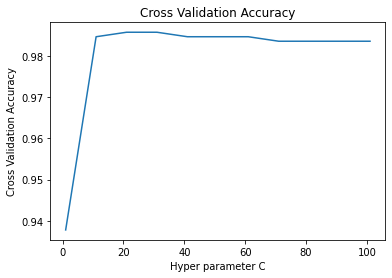

In [107]:
X_val=np.arange(1,111,10);
plt.title('Cross Validation Accuracy')
plt.xlabel('Hyper parameter C')
plt.ylabel('Cross Validation Accuracy')
plt.plot(X_val,cv_accuracy)
plt.show()

In [108]:
id=np.argsort(cv_accuracy)[::-1]
id[0]
C_max=X_val[id[0]]
C_max

31

In [109]:
#Building model using support vector machine
model = svm.SVC(C=C_max)
model.fit(features,y_train)

SVC(C=31, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
#Calculating Accuracy
features_test = cv.transform(x_test)
y_predict=model.predict(features_test)
print("Accuracy is : ",model.score(features_test,y_test))

Accuracy is :  0.982532751091703


In [111]:
print (len(y_predict),len(y_test))

1145 1145


In [112]:
False_positive=0
True_positive=0
False_negative=0
True_negative=0
for i in range(0,len(y_test)):
  if (y_test[i]==0 and y_predict[i]==0):
   True_negative+=1
  elif (y_test[i]==0 and y_predict[i]==1):
   False_positive+=1
  elif (y_test[i]==1 and y_predict[i]==0):
   False_negative+=1
  elif (y_test[i]==1 and y_predict[i]==1):
   True_positive+=1
print(True_positive,True_negative,False_positive,False_negative)

251 874 6 14


In [113]:
#Performance of Spam Classifier
Precision = True_positive / (True_positive + False_positive)
Recall = True_positive / (True_positive + False_negative)
Fscore = 2 * Precision * Recall / (Precision + Recall)
Accuracy = (True_positive + True_negative) / (True_positive + True_negative + False_positive + False_negative)
print ("Precision :",Precision)
print ("Recall :",Recall)
print ("Fscore :",Fscore)
print ("Accuracy :",Accuracy)

Precision : 0.9766536964980544
Recall : 0.9471698113207547
Fscore : 0.9616858237547892
Accuracy : 0.982532751091703


**Upload test.zip, The zip file of the folder containing test emails**

In [114]:
#To upload the test email Zip folder to current directory
uploaded=files.upload()

Saving test.zip to test.zip


In [115]:
#UnZip testmails into folder 'test' in current directory
!unzip test.zip

Archive:  test.zip
replace test/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/.DS_Store          
  inflating: test/email1.txt         
  inflating: test/email2.txt         


In [116]:
def predict(s):
  file = open('/content/test/'+s, "r")
  lines = file.readlines()
  string = '\t'.join([line.strip() for line in lines])
  f = open("temp.txt", "w")
  f.write(string)
  f.close()
  ft = open('/content/temp.txt', "r")
  features_test = cv.transform(ft)
  y_predict=model.predict(features_test)
  return y_predict

In [117]:
import os
def readmail():
  directory = '/content/test'
  for filename in os.listdir(directory):
      if filename.endswith(".txt"):
        class_label=predict(filename)
        print (filename,"-",class_label)
        f = open("result.txt", "a")
        f.write(filename+"-"+str(class_label)+'\n')
        f.close()
      else:
          continue

In [118]:
readmail()

email2.txt - [1]
email1.txt - [0]
